In [109]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For advanced and aesthetically pleasing visualizations
from sklearn.decomposition import PCA  # For dimensionality reduction (useful for visualization of clusters)
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.preprocessing import LabelEncoder  # For encoding categorical variables (if any)
from sklearn.cluster import KMeans  # For K-Means clustering
from sklearn.cluster import DBSCAN  # For density-based clustering
from sklearn.mixture import GaussianMixture  # For Gaussian Mixture Models (GMM)


In [111]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


# Data collection and Analysis 

In [113]:


data = pd.read_csv('Mall_Customers.csv')


In [114]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [115]:
data.shape

(200, 5)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [117]:
# Annual income and spending score as feature 

# Choose optimal K in K means Clustering

In [119]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  


In [120]:
# WCSS stands for Within-Cluster Sum of Squares. It is a metric used in K-Means clustering to evaluate the compactness of clusters. 
# Mathematically, it represents the sum of squared distances between each data point and the centroid of its assigned cluster.

In [121]:
wcss = []

# record the wcss ( euclidean distance of the cordinates from each clusters ( centroid ) 

k_range = range(1, 11)

In [122]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is equivalent to WCSS

/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

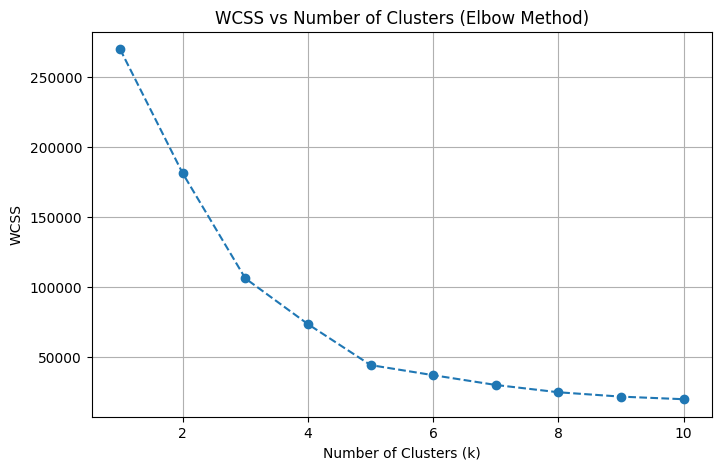

In [133]:

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('WCSS vs Number of Clusters (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# K = 5 is the optimal value

### Train the K means algorithm 

In [137]:

# Initialize KMeans with n_clusters=5
k_means = KMeans(n_clusters=5, n_init=5, init='k-means++', random_state=42)

# Fit the model and predict cluster assignments
Y = k_means.fit_predict(X)

# Check the unique cluster labels
unique_clusters = np.unique(Y)
print("Unique Clusters:", unique_clusters)
print("Number of Clusters:", len(unique_clusters))

# Display the cluster assignments for each data point
cluster_assignments = pd.DataFrame({'DataPointIndex': np.arange(len(Y)), 'Cluster': Y})
print(cluster_assignments)

Unique Clusters: [0 1 2 3 4]
Number of Clusters: 5
     DataPointIndex  Cluster
0                 0        4
1                 1        2
2                 2        4
3                 3        2
4                 4        4
..              ...      ...
195             195        1
196             196        3
197             197        1
198             198        3
199             199        1

[200 rows x 2 columns]


# Plotting the clusters 

### Scatter plot, corr, heatmap, count plot, pair plot, histogram, box plot

In [141]:
# X[Y==0,0] and X[Y==0,1] select the data points belonging to Cluster 1 (where Y==0), and the same is done for all other clusters.
# The s=50 argument sets the size of each data point on the plot.
# The c argument sets the color for each cluster. Each cluster gets a unique color (green, red, yellow, violet, blue).
# label='Cluster X' assigns a label to each cluster for the legend.

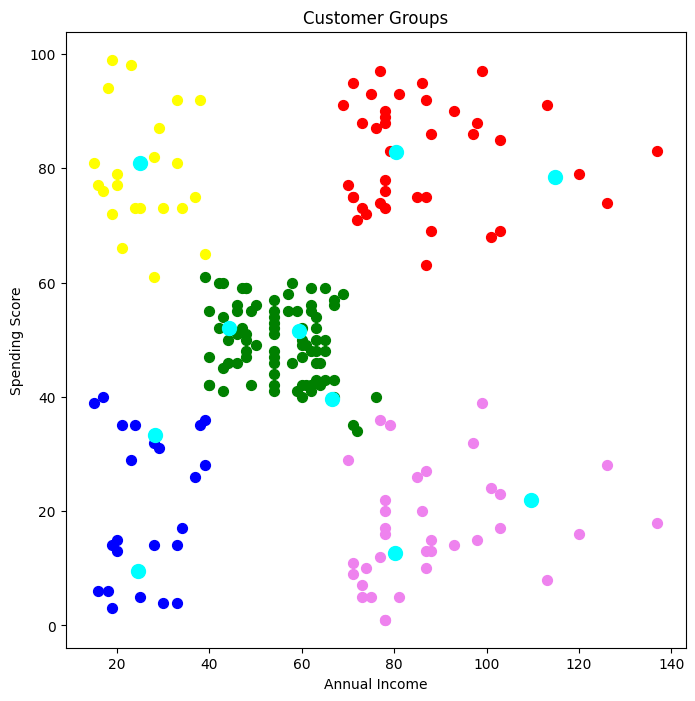

In [147]:
# Scatter plot for each clusters 
# plotting all the clusters and their Centroids
# Ensure X is a NumPy array
X = X.to_numpy()

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()